# Machine Learning SHap-Based Approach to Discover Metabolites in Small Cell Lung Cancer Metabolomics Data

In [32]:
# Import Libraies
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.font_manager import FontProperties
import shap
import numpy as np
import helperfunc
from sklearn.manifold import TSNE

# Dataset Detalis
## lung adenocarcinoma and squamous cell carcinoma are both types of non-small cell lung cancer (NSCLC).


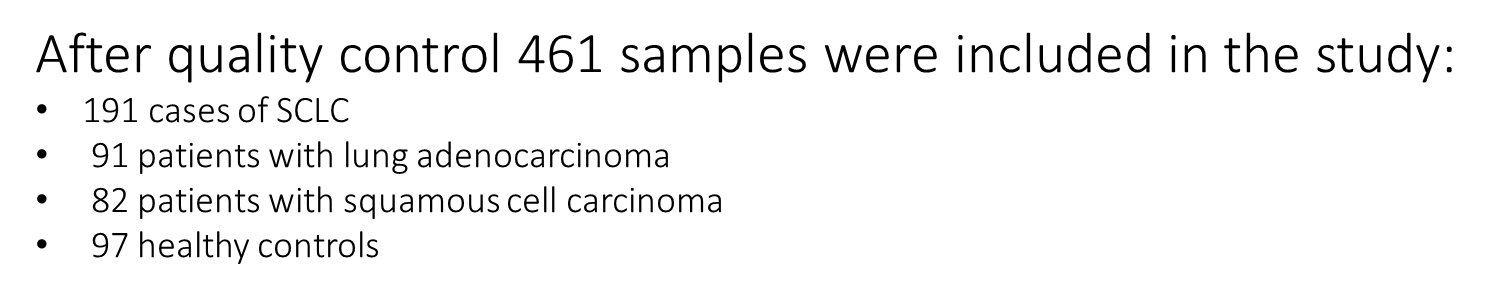

In [48]:
# Load the data
df = pd.read_csv("preprocess/final_meta_pos_D22.csv")
X = df.drop(columns=['label'])
y = df['label']

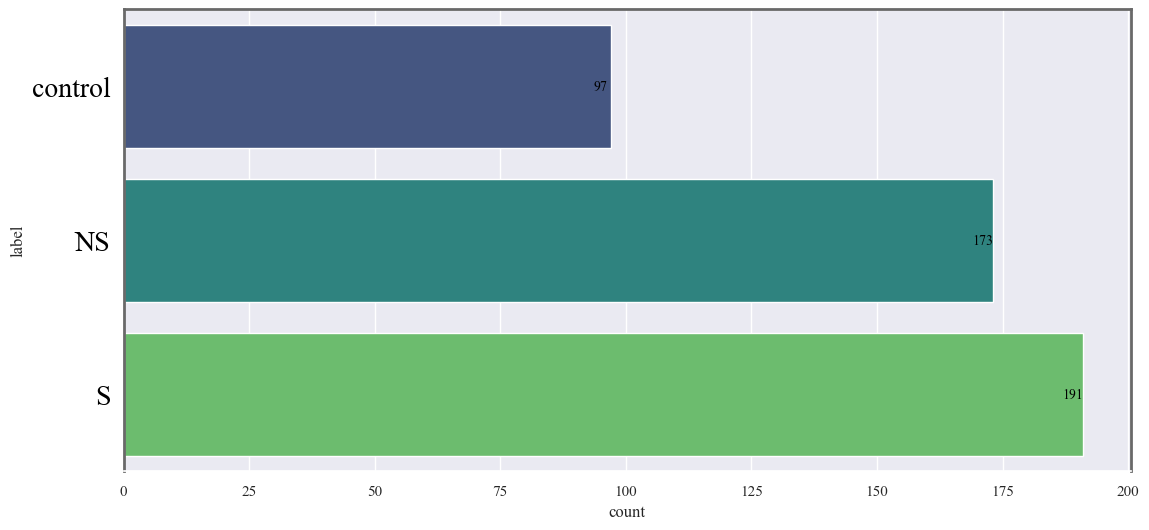

In [34]:
# Assuming df is your DataFrame containing the 'label' column
df['label'] = df['label']
plt.rcParams['font.family'] = 'Times New Roman'

# Set font size
plt.rcParams['font.size'] = 16
plt.figure(figsize=(13, 6))
g = sns.countplot(y=df['label'], palette='viridis')  # Use 'viridis' color palette or choose another one

# Apply the previous customization
bold_font = FontProperties()

for label in g.get_yticklabels():
    label.set_fontproperties(bold_font)
    label.set_fontsize(20)  # Increase font size for y-axis labels

for count in g.patches:
        # Increase font size for count text
    g.text(count.get_width() - 2, count.get_y() + count.get_height() / 2, 
           f'{int(count.get_width())}', ha="center", va="center", fontsize=10, color='black')


g.tick_params(axis='y', colors='black', labelsize=20)

g.spines['right'].set_visible(True)
g.spines['right'].set_color('dimgray')
g.spines['right'].set_linewidth(2)

g.spines['left'].set_visible(True)
g.spines['left'].set_color('dimgray')
g.spines['left'].set_linewidth(2)

g.spines['top'].set_visible(True)
g.spines['top'].set_color('dimgray')
g.spines['top'].set_linewidth(2)


# plt.savefig('figures/redrawfig/count_plot_high_res.pdf', dpi=4000, bbox_inches='tight')

plt.show()


# visualization

In [35]:
fet = X
fet_values = fet.values
fet_values.shape

(461, 152)

In [49]:
#NS and S in same group
replace_dict = {'NS': 'control'}
df['label'] = df['label'].replace(replace_dict)

X = df.drop(columns=['label'])
y = df['label']

In [50]:
y = y.replace('control',0)
y = y.replace('S',1)
# y = y.replace('S',2)


In [51]:
label_counts = y.value_counts()
label_counts

0    270
1    191
Name: label, dtype: int64

In [72]:
test_y = df['label'].tolist()
test_y_string = []
for each_item in test_y:
  if each_item == 0:
    test_y_string.append('Control')
  # elif each_item == 1:
  #   test_y_string.append('NS')
  else :
    test_y_string.append('S')

In [73]:
tsne = TSNE(n_components=2, random_state=2)
embedding_feature = tsne.fit_transform(fet_values)

# Top features
### ML models can identify the top contributing features (metabolites) to understand their significance in metabolomics data for small cell lung cancer.

Feature ranking:
1. feature no:6 feature name:Dioctyl phthalate (0.053741)
2. feature no:112 feature name:L-Phenylalanine (0.048270)
3. feature no:0 feature name:Phthalic acid Mono-2-ethylhexyl Ester (0.032239)
4. feature no:147 feature name:trans-Vaccenic acid (0.025203)
5. feature no:91 feature name:Gly-Glu (0.020835)
6. feature no:10 feature name:L-Arginine (0.020712)
7. feature no:118 feature name:Lys-Leu (0.020179)
8. feature no:14 feature name:Erucamide (0.019514)
9. feature no:104 feature name:Leu-Phe (0.018785)
10. feature no:86 feature name:Glutaraldehyde (0.017579)
11. feature no:5 feature name:Phe-Phe (0.016864)
12. feature no:16 feature name:1-2-Benzenedicarboxylic acid (0.015758)
13. feature no:135 feature name:Pro-Arg (0.015000)
14. feature no:36 feature name:2-Phenylbutyric acid (0.014299)
15. feature no:52 feature name:alpha-Tocopherol (Vitamin E) (0.014264)
16. feature no:3 feature name:1-Myristoyl-sn-glycero-3-phosphocholine (0.014073)
17. feature no:130 feature name:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


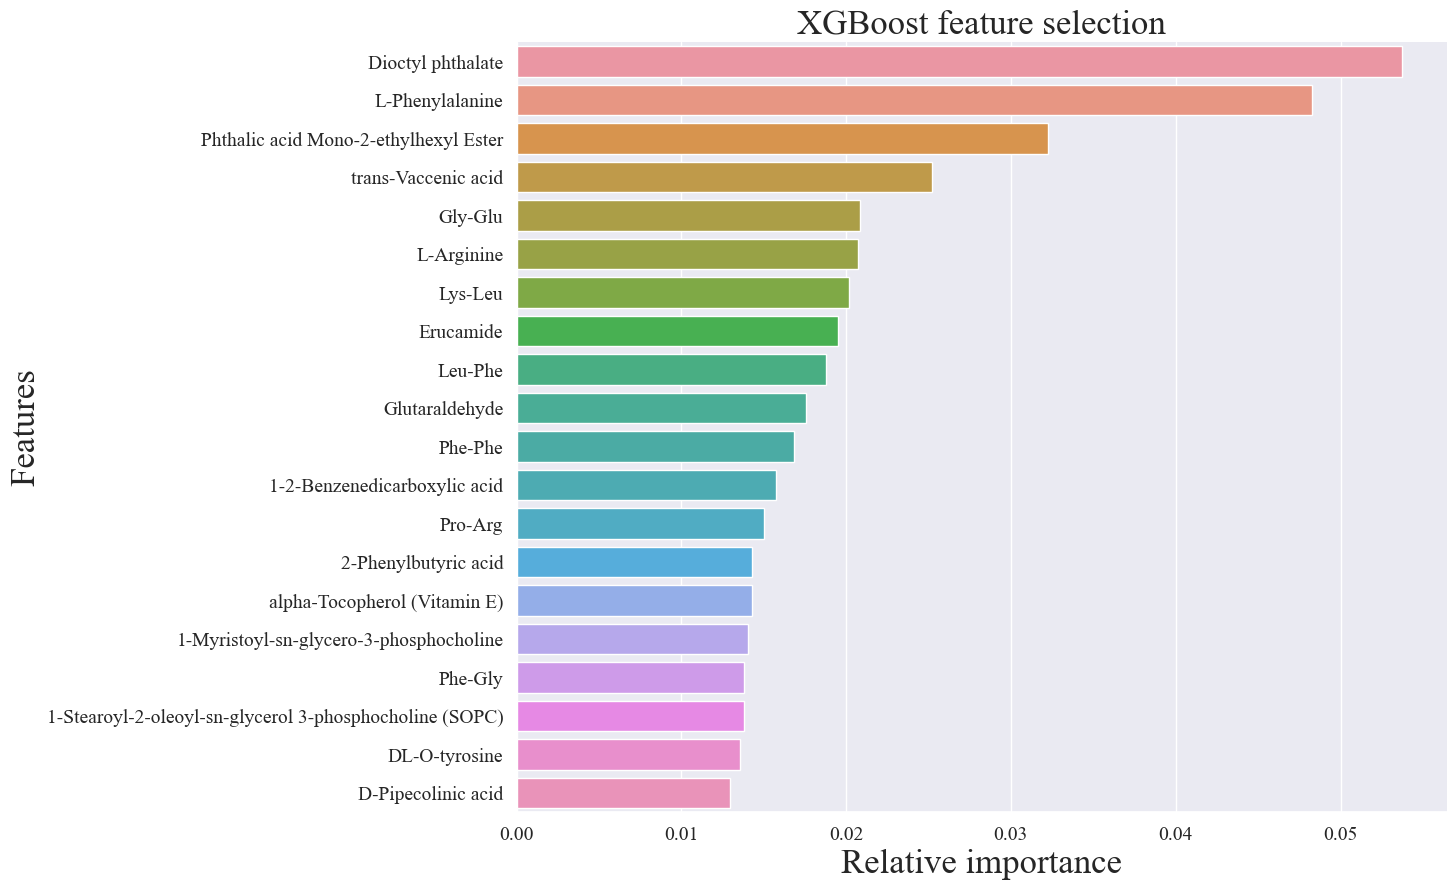

-----------------------------------------------------------------
Feature ranking:
1. feature no:16 feature name:1-2-Benzenedicarboxylic acid (0.064160)
2. feature no:0 feature name:Phthalic acid Mono-2-ethylhexyl Ester (0.048515)
3. feature no:104 feature name:Leu-Phe (0.045983)
4. feature no:133 feature name:Phe-Ser (0.041143)
5. feature no:137 feature name:(R)-3-Hydroxybutyric acid (0.035865)
6. feature no:6 feature name:Dioctyl phthalate (0.033640)
7. feature no:71 feature name:DL-Phenylalanine (0.019803)
8. feature no:3 feature name:1-Myristoyl-sn-glycero-3-phosphocholine (0.019761)
9. feature no:73 feature name:Dopamine (0.018145)
10. feature no:86 feature name:Glutaraldehyde (0.016637)
11. feature no:108 feature name:Linoleic acid (0.012808)
12. feature no:69 feature name:DL-Indole-3-lactic acid (0.011835)
13. feature no:70 feature name:DL-O-tyrosine (0.011712)
14. feature no:66 feature name:D-erythro-Sphingosine-1-phosphate (0.011433)
15. feature no:52 feature name:alpha-Tocoph

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


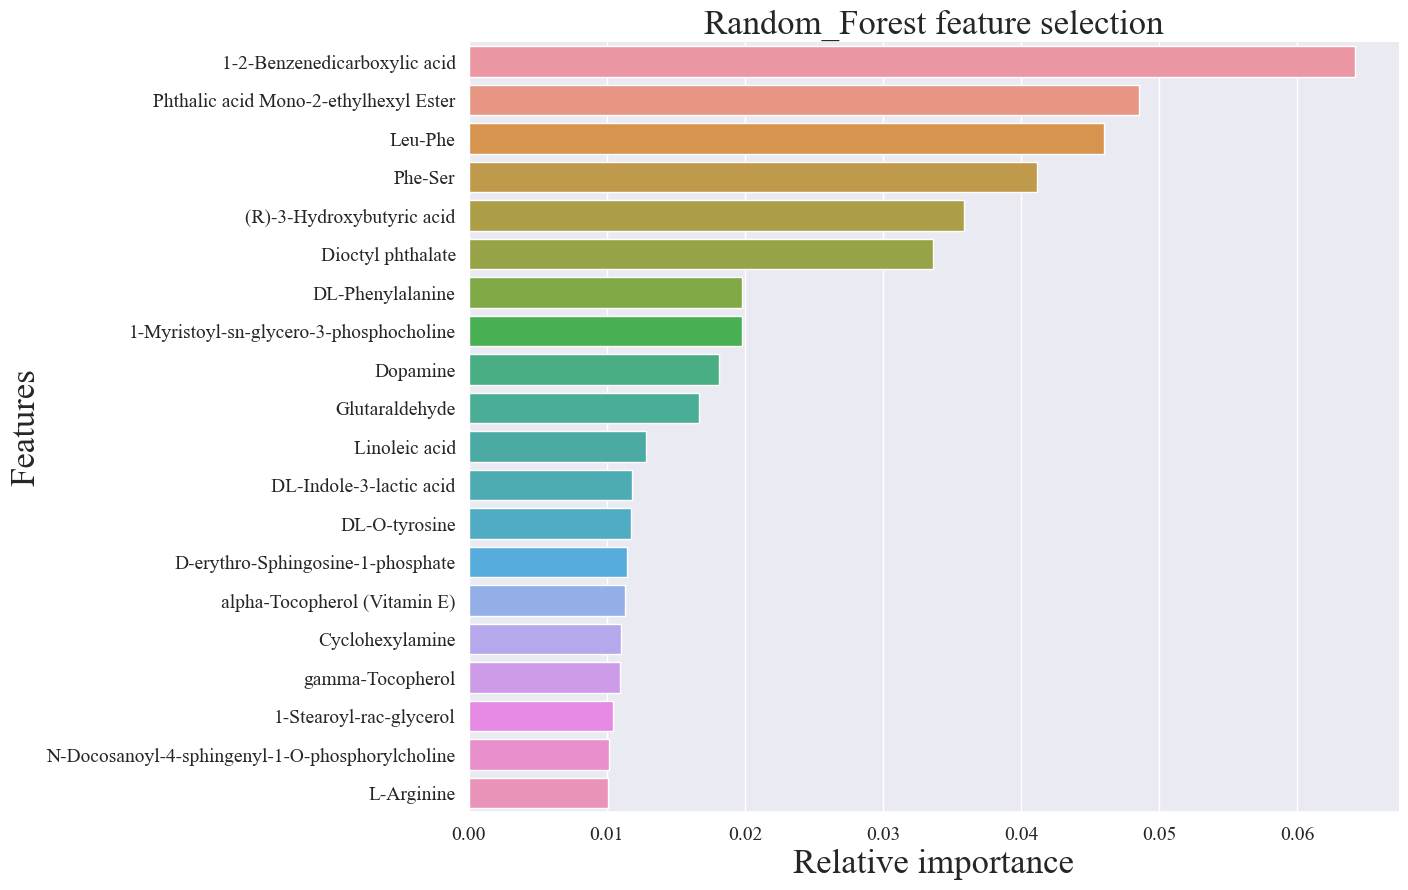

-----------------------------------------------------------------
Feature ranking:
1. feature no:16 feature name:1-2-Benzenedicarboxylic acid (0.043743)
2. feature no:6 feature name:Dioctyl phthalate (0.040208)
3. feature no:0 feature name:Phthalic acid Mono-2-ethylhexyl Ester (0.037380)
4. feature no:104 feature name:Leu-Phe (0.033086)
5. feature no:133 feature name:Phe-Ser (0.023595)
6. feature no:137 feature name:(R)-3-Hydroxybutyric acid (0.016450)
7. feature no:71 feature name:DL-Phenylalanine (0.016322)
8. feature no:53 feature name:Androstanedione (0.013925)
9. feature no:108 feature name:Linoleic acid (0.010436)
10. feature no:146 feature name:trans-Dehydroandrosterone (0.009493)
11. feature no:5 feature name:Phe-Phe (0.009463)
12. feature no:86 feature name:Glutaraldehyde (0.009317)
13. feature no:1 feature name:Lavandulol (0.009308)
14. feature no:79 feature name:Fisetinidol (0.009121)
15. feature no:3 feature name:1-Myristoyl-sn-glycero-3-phosphocholine (0.008930)
16. featur

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


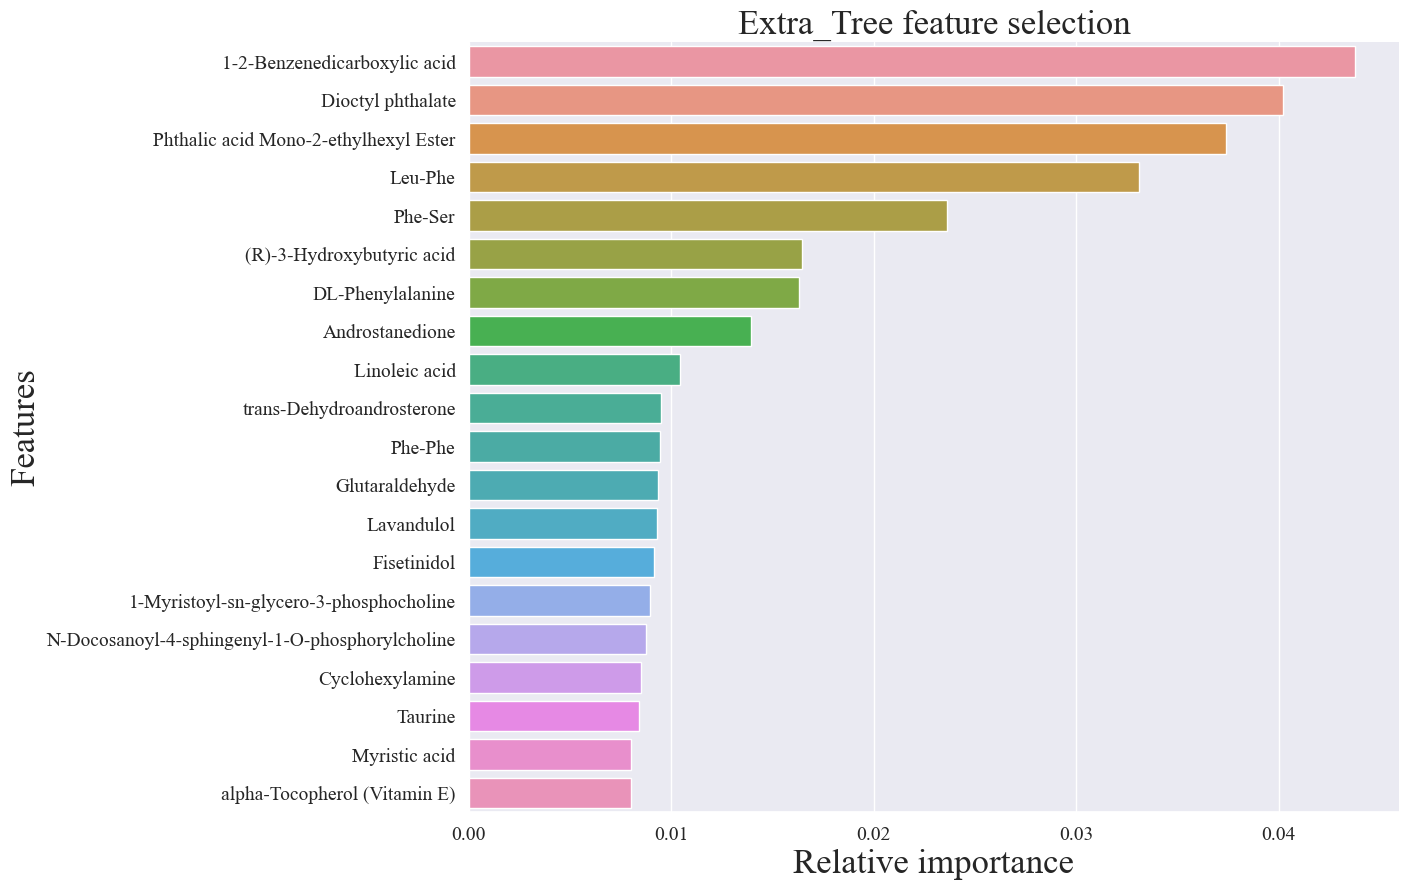

-----------------------------------------------------------------


In [52]:
xgboost,randomforest,extratree = helperfunc.feature_selection_without_gen(X, y)

## We Used RandomForest feature selection model
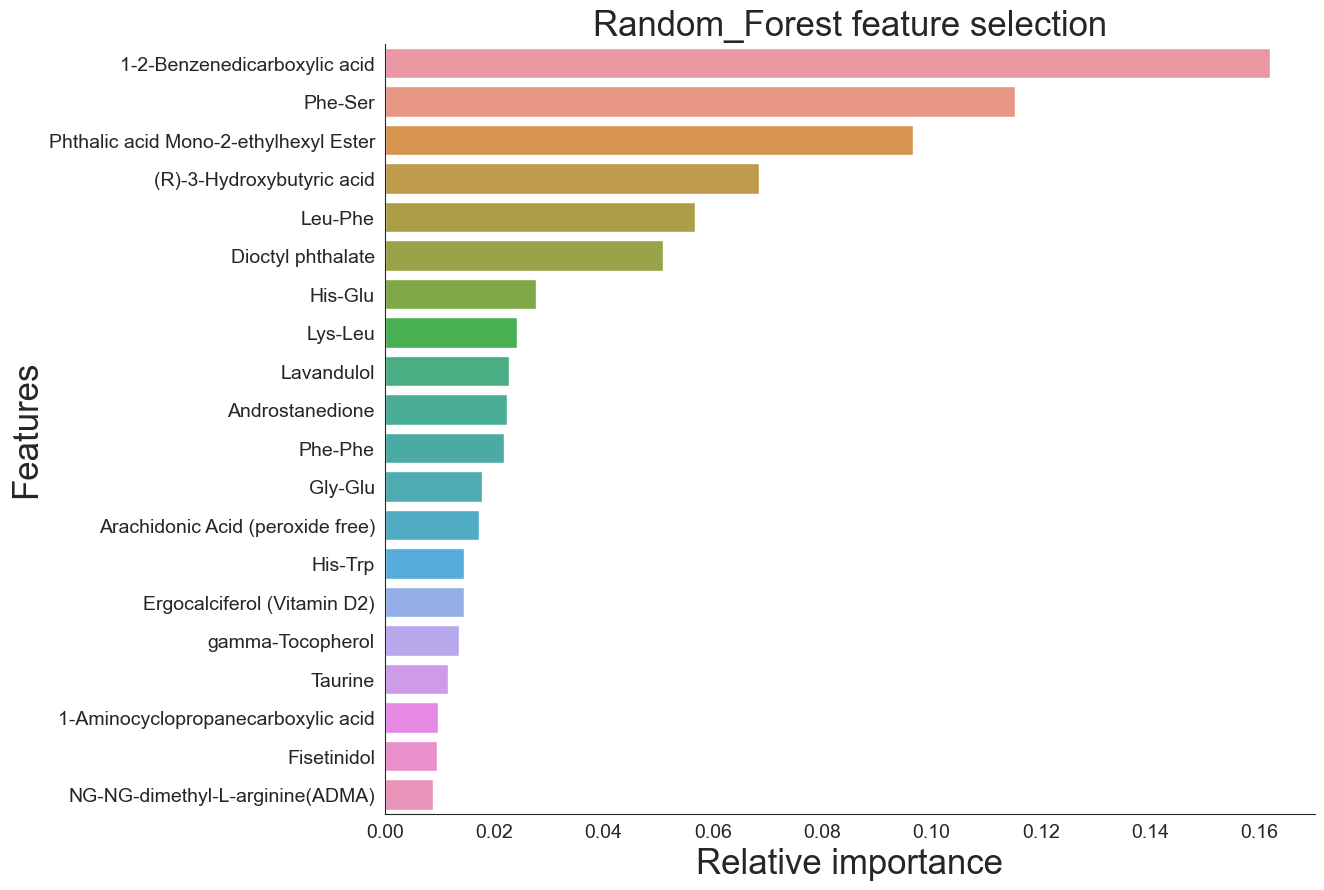


# t-SNE  Plot 


### t-SNE (t-distributed Stochastic Neighbor Embedding) is used to visualize high-dimensional data by reducing it to two or three dimensions while preserving the structure and relationships between data points. This helps in understanding patterns, clusters, and similarities in complex datasets, such as those in metabolomics studies. 


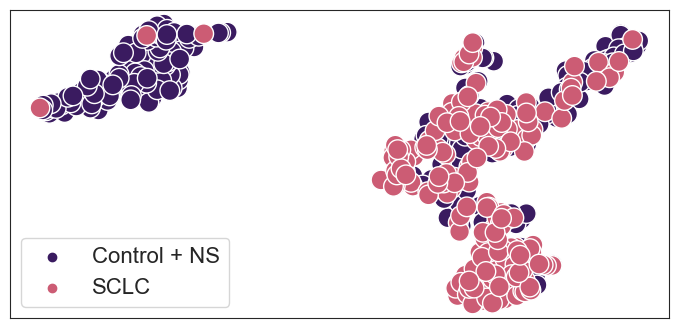

In [83]:


data_raw = X[randomforest[:10]] #using 10 top features
fet_df = data_raw
#fet_df
fet_values = fet_df.values
fet_values.shape
tsne = TSNE(n_components=2, random_state=2)
embedding_feature = tsne.fit_transform(fet_values)

def plt_tsne(X, Y, Y_value):
    # Map numerical labels to string labels
    label_mapping = {
        0: 'Control + NS',
        1: 'SCLC',
#         2: 'INFA',
#         3: 'RSV'
    }

    # Replace numerical labels with string labels
    Y_strings = [label_mapping[label] for label in y]

    df_subset = pd.DataFrame(list(zip(Y_strings, Y_value)), columns=['', ' '])
    df_subset['1st Component'] = X[:, 0]
    df_subset['2nd Component'] = X[:, 1]

    plt.figure(figsize=(8.5, 4))
    sns.set_style("white")

    # Define custom colors for the scatterplot for four classes
    colors = ['#3a1b60','#cc5c74']#[ '#6890F0', '#A8B820'] #'#78C850', '#F08030',

    ax = sns.scatterplot(
        data=df_subset, x="1st Component", y="2nd Component", hue="", palette=colors,
        s=200, legend='full', edgecolors=colors, linewidth=1
    )

    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.grid(False)

    # Customize spines

    # plt.savefig('Figures/top_20_tsne_COVID19.pdf', dpi=4000, bbox_inches='tight')

# Assuming test_y and test_y_string are defined
plt_tsne(embedding_feature, test_y, test_y_string)


# hierarchical cluster plot (All class)

###

In [24]:
raw_data_df = pd.read_csv("preprocess/final_meta_pos_D22.csv")
X1 = df.drop(columns=['label'])

y1 = df['label']

In [25]:
Control_spectrum_df = raw_data_df[raw_data_df['label'] == 'control']
S_spectrum_df = raw_data_df[raw_data_df['label'] == 'S']
NS_spectrum_df = raw_data_df[raw_data_df['label'] == 'NS']


In [26]:
mean_Control_spectrum_df =Control_spectrum_df.mean().tolist()
mean_S_spectrum_df = S_spectrum_df.mean().tolist()
mean_NS_spectrum_df = NS_spectrum_df.mean().tolist()
mean_NS_spectrum_df

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


[198498.5494504046,
 14979.003810225435,
 1600220.4612317916,
 473202.51126826584,
 428614.4006075146,
 410446.9466321272,
 724134.8619032948,
 18940768.407572255,
 7183913.982820809,
 508054.81219797686,
 10491842.234136995,
 10330883.609606937,
 417616.73667080933,
 1182486.5383660118,
 3170647.5155780343,
 1893388.2767393065,
 94957.70589464509,
 120633.85019710983,
 11575.686210277456,
 9915.6448667763,
 98719.04184820809,
 19342.506899341035,
 78935.38035734104,
 460150.726316185,
 175817.77762497112,
 94935.40122488438,
 195544.20450884392,
 7500.993200144509,
 74742.79639930636,
 543008.696554104,
 82201.57103536995,
 3707.8381544554913,
 22308.5387097526,
 53948.91674780346,
 318165.62636589597,
 3879.661368028324,
 36508.900529017345,
 20161.250568791907,
 771229.8684182081,
 595530.4111751446,
 7253.39991133526,
 3531.367273715433,
 5116.356725179191,
 6435.837391187861,
 15525.016514890172,
 5034.495001681504,
 93169.70282919076,
 70795.47807655492,
 76784.09779728322,
 5898

In [27]:
mean_df_data_list = [mean_Control_spectrum_df, mean_S_spectrum_df,mean_NS_spectrum_df]
class_wise_mean_df = pd.DataFrame(mean_df_data_list, columns=list(raw_data_df)[:-1])
class_wise_mean_df = class_wise_mean_df.set_index(pd.Index(['control','NS','S']))
class_wise_mean_df = class_wise_mean_df.reset_index().rename(columns={'index' : ' '})
class_wise_mean_df

,,label,Phthalic acid Mono-2-ethylhexyl Ester,Lavandulol,N-Docosanoyl-4-sphingenyl-1-O-phosphorylcholine,1-Myristoyl-sn-glycero-3-phosphocholine,L-Palmitoylcarnitine,Phe-Phe,Dioctyl phthalate,1-Oleoyl-sn-glycero-3-phosphocholine,...,Stearidonic Acid,Stearoylcarnitine,Taurine,Thioetheramide-PC,trans-3-Coumaric acid,trans-Dehydroandrosterone,trans-Vaccenic acid,Triethanolamine,Tyramine,Uracil
0,control,23891.715763,1.004528e+06,1.520672e+06,456813.419944,436960.896434,681724.324977,31448.251304,1.842745e+07,7.065526e+06,...,10214.747890,268875.782671,2.070218e+06,7635.438549,21169.064553,91729.934713,5998.514415,1.151282e+06,42836.779678,9798.722086
1,NS,179679.833780,1.401713e+04,1.809751e+06,379632.955908,386007.062149,419611.175604,615589.806626,1.802874e+07,6.880231e+06,...,11632.081182,229239.365920,2.259086e+06,10017.838661,13131.237959,52232.616696,5681.781835,1.218004e+06,36642.936257,11280.011728
2,S,198498.549450,1.497900e+04,1.600220e+06,473202.511268,428614.400608,410446.946632,724134.861903,1.894077e+07,7.183914e+06,...,13224.900470,226951.341832,2.401328e+06,10826.326639,16144.294193,47228.723014,6414.279705,1.260988e+06,37493.988296,11717.598721


In [20]:
selected_fet = randomforest[:10]
selected_class_wise_mean_df =  class_wise_mean_df[selected_fet]
selected_class_wise_mean_df

,1-2-Benzenedicarboxylic acid,Phthalic acid Mono-2-ethylhexyl Ester,Dioctyl phthalate,Phe-Ser,Leu-Phe,(R)-3-Hydroxybutyric acid,Glutaraldehyde,His-Glu,Lys-Leu,Arachidonic Acid (peroxide free)
0,112016.066892,1.004528e+06,1.842745e+07,362802.401644,9338.928839,20887.192093,37527.882597,8128.760872,95380.482558,15537.178019
1,122096.484372,1.401713e+04,1.802874e+07,356629.873454,9433.037617,14496.683423,48376.883728,5687.823903,119011.514778,17547.201141
2,120633.850197,1.497900e+04,1.894077e+07,356425.415382,9747.246493,18610.507455,58497.640092,5640.688843,123298.776238,18707.617987


### Heatmap Interpretation

This heatmap represents a hierarchical clustering of three classes based on the similarity or dissimilarity of certain features. Here's a breakdown of the key elements and interpretation:

**Heatmap Components:**
- **Columns**: Represent different features or variables (e.g., chemicals or compounds).
- **Rows**: Represent three different classes (0, 1, and 2).
- **Colors**: Indicate the values of the features for each class. The color scale on the left shows the mapping from values to colors, with darker colors representing lower values and lighter colors representing higher values.

**Interpretation:**

**Clusters:**
- **Row Clustering**: The classes are grouped based on their similarity in terms of the features. Class 0, Class 1, and Class 2 show distinct patterns in the heatmap, indicating that they have different feature profiles.
- **Column Clustering**: The features are also clustered based on their similarity across the classes. This helps to identify groups of features that behave similarly.

**Feature Profiles:**
- Class 0 has high values for Dioctyl phthalate and low values for other features.
- Class 1 has intermediate values for a set of features (e.g., 1,2-Benzenedicarboxylic acid, Lys-Leu, and Glutaraldehyde).
- Class 2 shows a distinct high value for (R)-3-Hydroxybutyric acid and some intermediate values for other features.


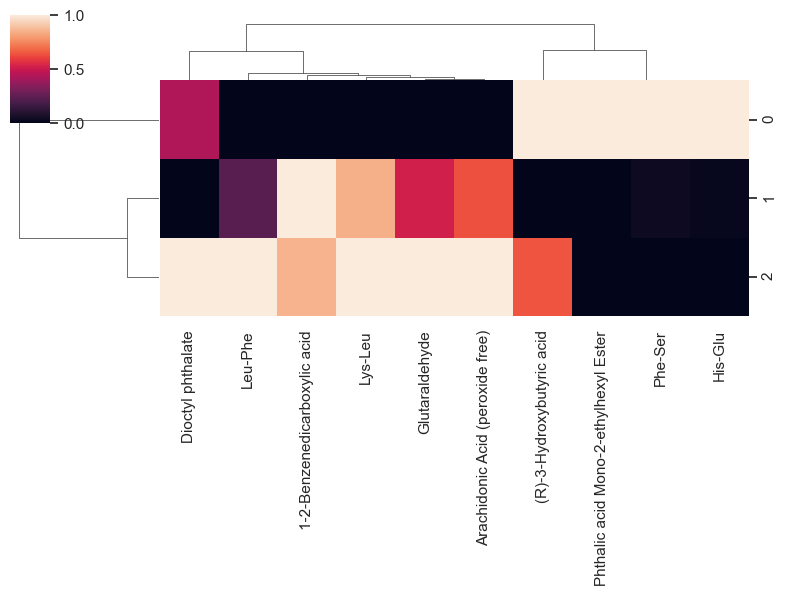

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(14,6))
import sys
sys.setrecursionlimit(10000)
sns.set(font_scale=1)
g = sns.clustermap(selected_class_wise_mean_df,metric="correlation", method="single", standard_scale=1, dendrogram_ratio=(.2, .2), figsize=(8, 6))

plt.savefig('check_heat.png', dpi=300, bbox_inches='tight')
#fig = g.get_figure()
#fig.savefig('check_heat.png', dpi=300, bbox_inches='tight')

## parallel_coordinates Plot

In [23]:
from pandas.plotting import parallel_coordinates
import pandas as pd
import sklearn.preprocessing

In [30]:


# Assuming data_raw is your DataFrame
data_raw = raw_data_df



labels = randomforest[:10]
data_raw = data_raw
trimed_df = data_raw[labels+['label']]
trimed_df
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
trimed_df[list(trimed_df)[:-1]] = min_max_scaler.fit_transform(trimed_df[list(trimed_df)[:-1]])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


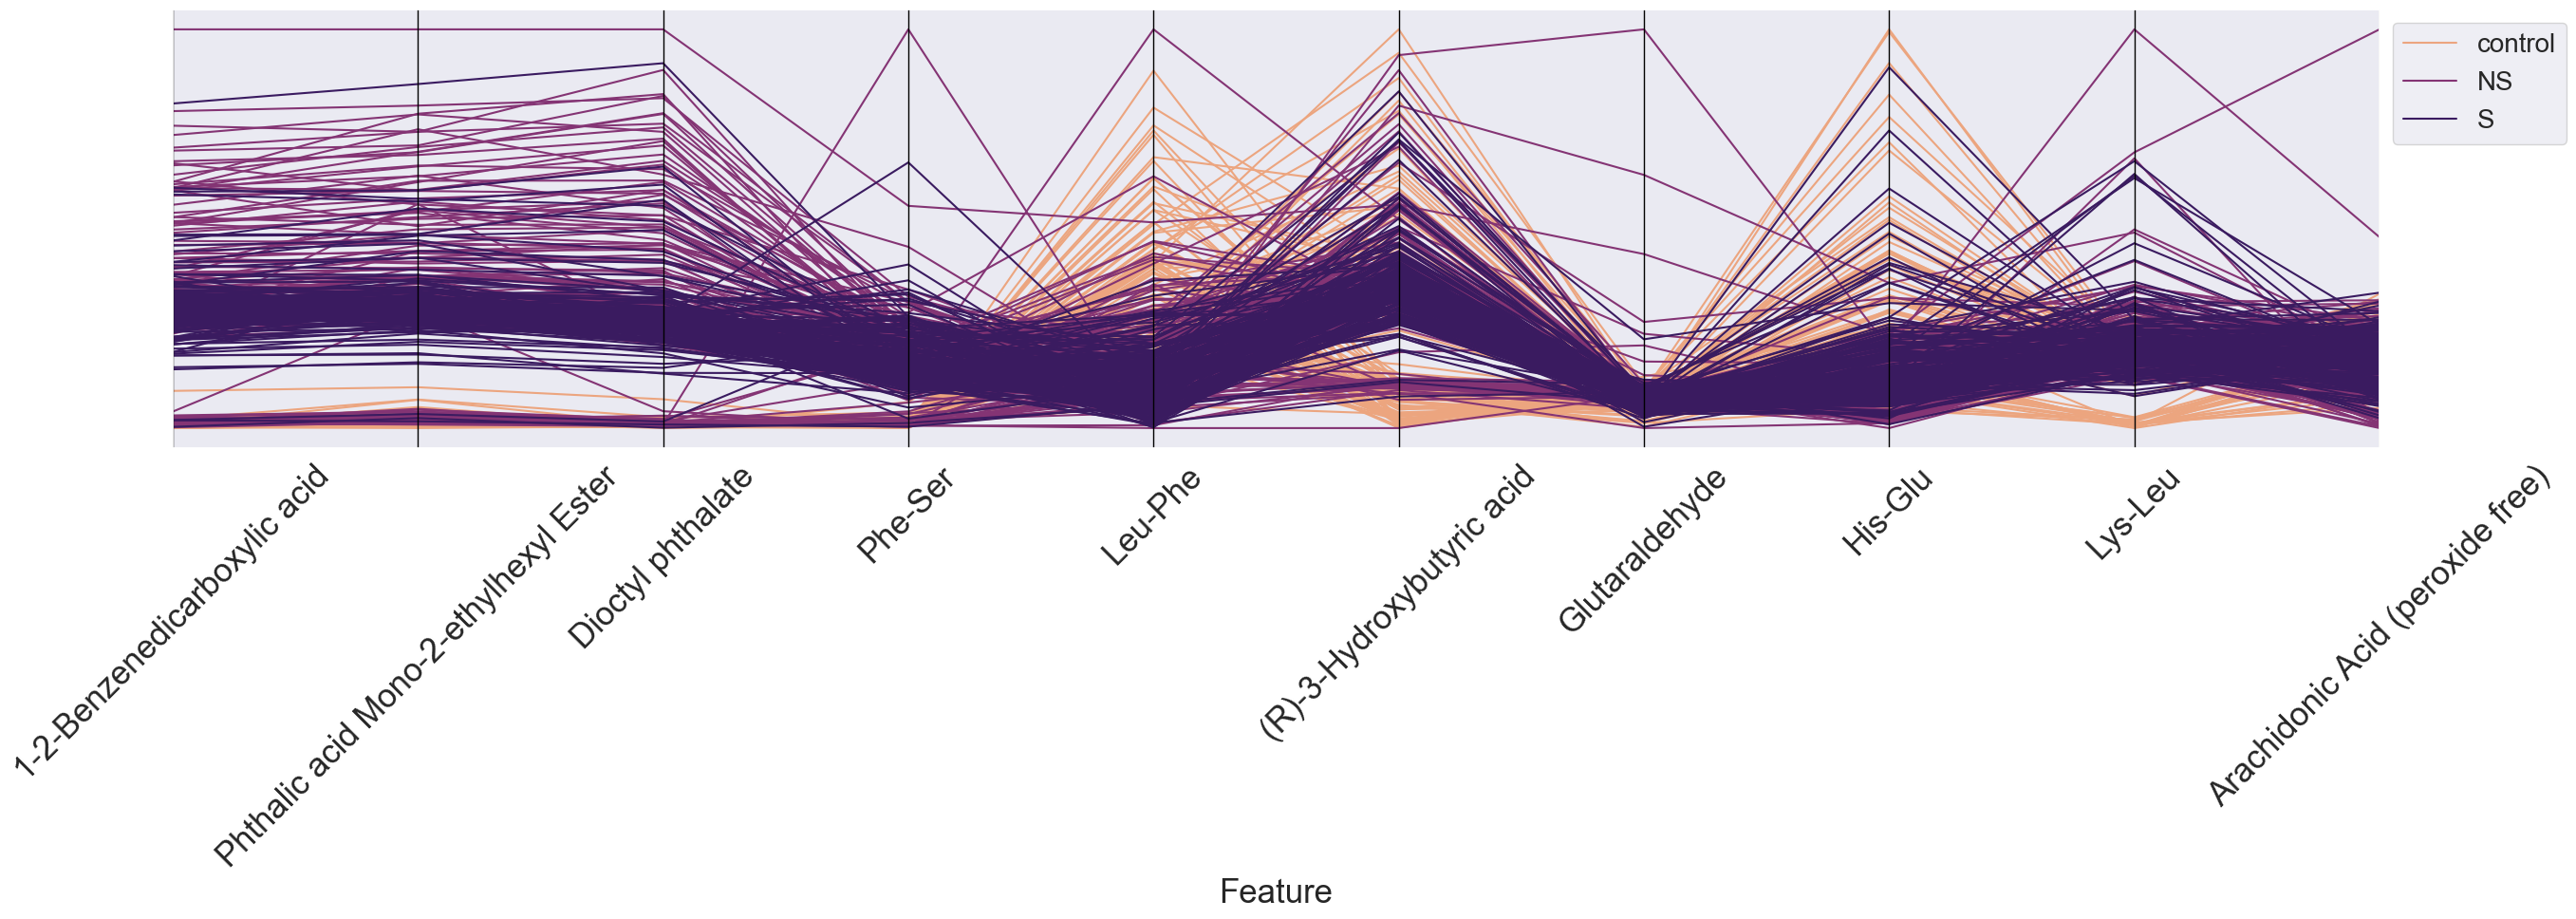

In [31]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Assuming trimed_df and 'label' are your actual DataFrame and column name
plt.figure(figsize=(30, 6))

# Define a color map between '#78C850' and '#F08030'
colors = ['#eca57f', '#843474','#3a1b60']
trimed_df['label'] = trimed_df['label'] #.replace({0: 'Control', 1: 'Positive'})
parallel_coordinates(trimed_df, 'label', color=colors)

plt.xticks(rotation=45, fontsize=25)
plt.yticks([])

# Increase label text size
plt.xlabel("Feature", fontsize=25)

# Move the legend to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=20)

# # Save the plot
# plt.savefig('Figures/parallelF4.pdf', dpi=4000, bbox_inches='tight')
plt.show()


# Train with ML Models


### fold data

In [53]:
fold_data = helperfunc.cv_fold(X1=X,yt=y,n_splits=5)
fold_data

{'data': ([array([[-1.32603908, -0.24292703, -0.19805329, ..., -0.31496194,
           -0.35258374, -0.35962267],
          [-1.30139637,  2.17511036, -0.62574068, ..., -0.07104989,
            0.66571509, -0.70832437],
          [-1.36924788, -0.26090182,  0.14451329, ..., -0.10167537,
            0.84065027,  0.21715737],
          ...,
          [ 0.28361648, -0.24283024, -0.63839163, ...,  0.32421469,
           -0.71577724, -0.3057806 ],
          [ 0.35015907, -0.26286192,  1.97053661, ..., -0.08981376,
           -0.55646482, -0.17677248],
          [ 0.3732719 , -0.259221  ,  1.2171857 , ...,  0.05575311,
           -0.06588406,  0.18028893]]),
   array([[-1.16325868, -0.24416384, -0.18320144, ..., -2.88397071,
            0.44233046, -1.02190205],
          [-1.31011467,  2.4976758 , -0.4508947 , ...,  0.06190086,
            0.87429761, -0.03882633],
          [-1.3151143 , -0.2634082 , -0.34740715, ..., -0.73586719,
           -0.11954857, -0.74935591],
          ...,
      

In [61]:
feature_num= 30
#feature_num= len(filtered_xgboost)
feature_selection_model= randomforest
#feature_selection_model= filtered_xgboost   ##choose any of them [xgboost,randomforest,extratree, genetic_feature_selection]
classifier='all' ## choose 'all' for all models

#Classification with top features increasing by 1 by 1
top_models, Result, prb1, prb0, ytest, tar, pred, confusion_matrices, rep =helperfunc.classification_with_combined_features_withauc2(fold_data,feature_num,feature_selection_model,classifier)


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

[22:45:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[22:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[22:45:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[22:45:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[22:45:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windo

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


In [62]:
Result

,Accuracy,Precision,Recall,Specificity,F1-score,AUC
MLPClassifier,77.874187,77.791140,77.874187,76.075784,77.819221,85.11
LinearDiscriminantAnalysis,75.488069,78.100506,75.488069,78.370763,75.633034,83.17
XGBClassifier,80.043384,80.646960,80.043384,80.520898,80.162968,85.42
RandomForestClassifier,78.741866,79.521151,78.741866,79.447004,78.881551,86.57
LogisticRegression,73.969631,74.697241,73.969631,74.232812,74.133644,82.65
SVM,65.292842,69.164713,65.292842,69.167116,65.305580,78.67
ExtraTreesClassifier,76.572668,80.123986,76.572668,80.363535,76.655171,86.68
AdaBoostClassifier,78.524946,78.769268,78.524946,78.068035,78.602212,83.91
KNeighborsClassifier,78.524946,81.038512,78.524946,81.438211,78.658693,83.98
GradientBoostingClassifier,75.704989,75.786923,75.704989,74.541278,75.740217,82.63


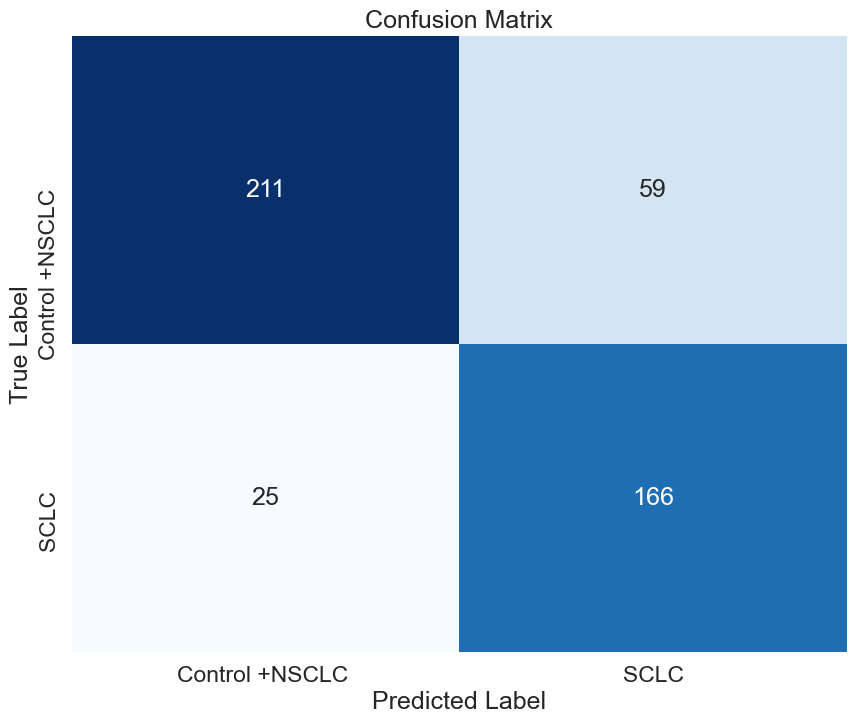

In [63]:
#Confussion Mattrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming your confusion matrix is stored in the variable 'conf_matrix'
conf_matrix  = confusion_matrices[16]['confusion_matrix'] 
# Define class labels
# class_labels = ['Control', 'S','NS']
class_labels = ['Control +NSCLC ', 'SCLC']
# Create a DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Set font size
sns.set(font_scale=1.5)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save as PDF
# plt.savefig('Figures/Results/confusion_matrix4_allresp_covid_v2.pdf',dpi=4000,  format='pdf', bbox_inches='tight')

plt.show()


In [64]:
#Save model 
import pickle
# # Directory where models will be saved
import os
model_save_path = "Pickel_models2"  # Replace with your desired path

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

# Save each model to the specified directory
i=1
for mdl in top_models:
    # print(model)
    model_path = os.path.join(model_save_path, f"top_model_{i+1}.pkl")
    i = i+1
    with open(model_path, "wb") as file:
        pickle.dump(mdl, file)

# # print("Top 3 models saved successfully.")

#### AUC 

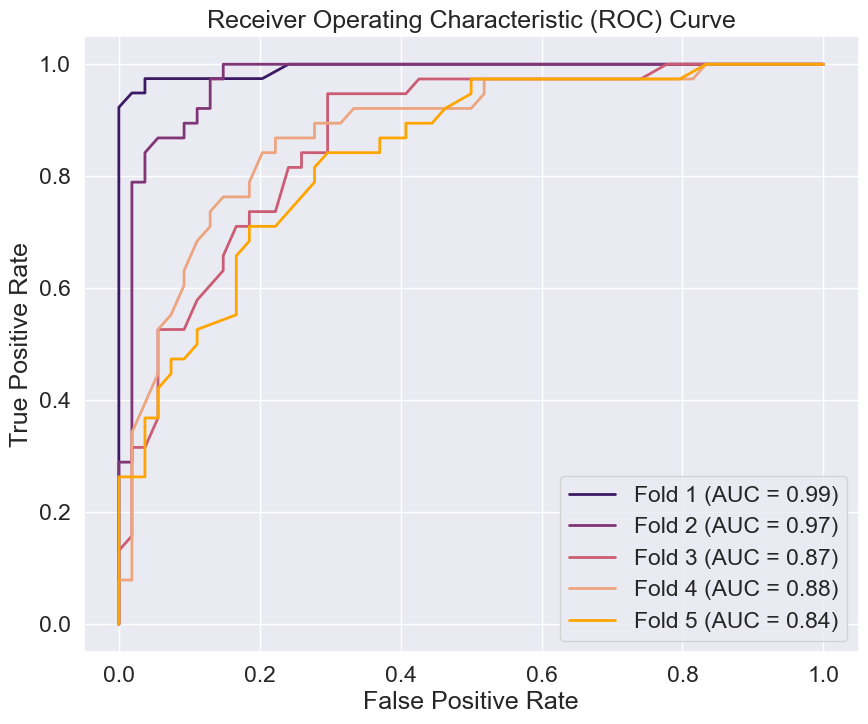

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
ml1=prb1[16]
y1 =ytest
# Assuming ml1 is a list containing probability predictions for each fold
# and y1 is a list containing true labels for each fold

plt.figure(figsize=(10, 8), facecolor='w')  # Set facecolor to white

# Define a set of colors for each fold
colors = ['#3c1a64', '#803576', '#cc5c74', '#eda57f', 'orange']

for fold_num in range(5):
    probabilities = np.array(ml1[fold_num])
    true_labels = y1[fold_num]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each fold with a different color and style
    plt.plot(fpr, tpr, lw=2, label=f'Fold {fold_num + 1} (AUC = %0.2f)' % roc_auc, color=colors[fold_num], linestyle='-')

# Plot the diagonal line for reference

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
# plt.savefig('Figures/Results/auc_ControlvsALLRes1_v2.pdf', bbox_inches='tight', dpi=4000)
plt.show()


## SHAP analysis 
###### SHAP (SHapley Additive exPlanations) is a powerful tool for interpreting machine learning models. It uses game theory to explain the output of any machine learning model. 


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


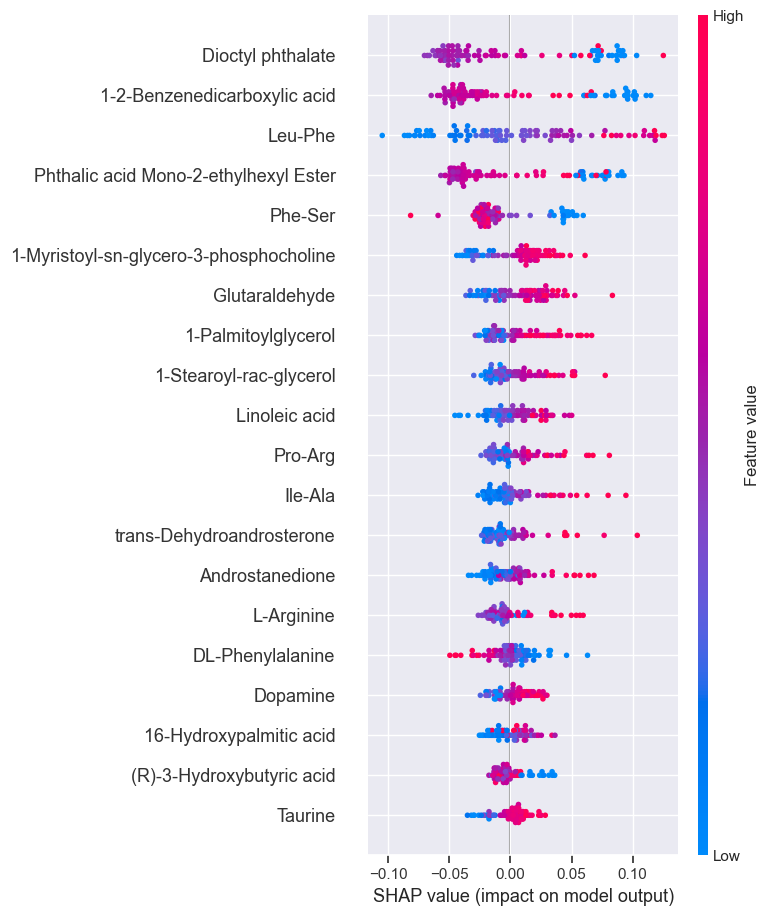

In [89]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
import shap

# Load the model
model_2 = joblib.load('Pickel_models2/top_model_2.pkl')

# Load the test data
top_features =randomforest[:30]
X_top = X[top_features]
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model_2)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP values or use them as needed
shap.summary_plot(shap_values[0], X_test_scaled, feature_names=top_features)


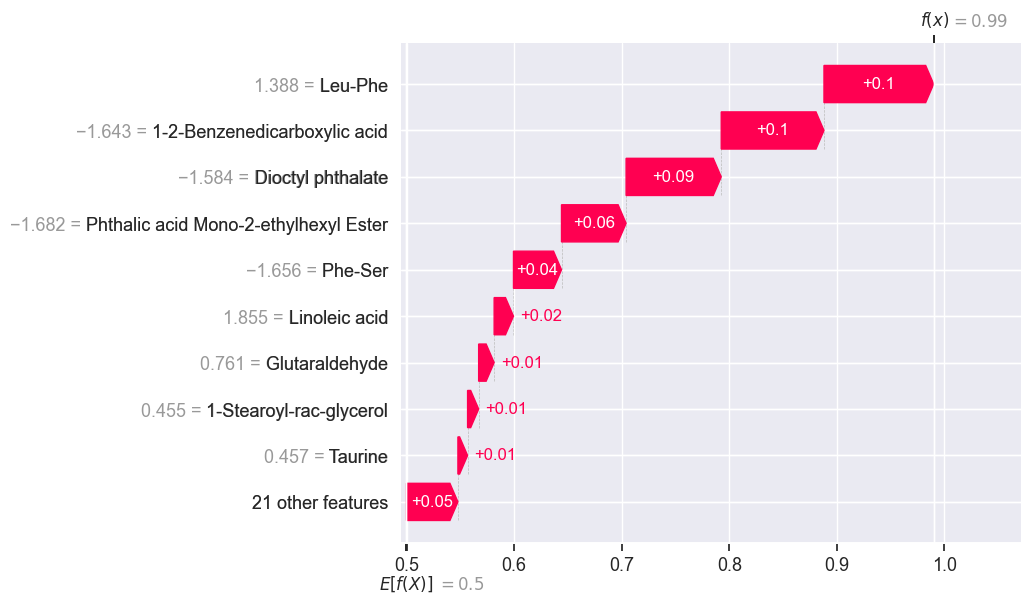

In [101]:
instance_index = 3  # Change this index to explain different instances
instance = X_test_scaled[instance_index]

# Waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values[0][instance_index], 
                                     base_values=explainer.expected_value[0], 
                                     data=instance, 
                                     feature_names=top_features))


plt.show()

In [100]:
# Force plot
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index], instance, feature_names=top_features)